**This notebook contains the following sections:**

**#01** Importing libraries and data

**#02** Prepping data for regression analysis

**#03** Regression analysis

**#04** Thoughts

**#01 Importing libraries and data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
path = '/Users/gingermoore/Documents/06-2025 Airbnb Dallas/02 Data'

In [7]:
df = pd.read_pickle(os.path.join(path, 'Transformed Data', 'CleanDallasDataFinal.pkl'))

In [8]:
df.head()

listing_id                           name  \
0      61878  MODERN LIVING AND FURNISHINGS   
1      61878  MODERN LIVING AND FURNISHINGS   
2      61878  MODERN LIVING AND FURNISHINGS   
3      61878  MODERN LIVING AND FURNISHINGS   
4      61878  MODERN LIVING AND FURNISHINGS   

                                         description  \
0  Close to downtown and Uptown.  Fast and conven...   
1  Close to downtown and Uptown.  Fast and conven...   
2  Close to downtown and Uptown.  Fast and conven...   
3  Close to downtown and Uptown.  Fast and conven...   
4  Close to downtown and Uptown.  Fast and conven...   

                               neighborhood_overview host_id host_since  \
0  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
1  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
2  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
3  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
4  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   

  host_location  host_response_time  host_response_rate  host_acceptance_rate  \
0   Roanoke, TX  within a few hours               100.0                  88.0   
1   Roanoke, TX  within a few hours               100.0                  88.0   
2   Roanoke, TX  within a few hours               100.0                  88.0   
3   Roanoke, TX  within a few hours               100.0                  88.0   
4   Roanoke, TX  within a few hours               100.0                  88.0   

  host_neighbourhood    district  latitude  longitude property_type  \
0           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
1           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
2           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
3           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
4           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   

         room_type  accommodates  bathrooms  bedrooms  beds  min_nights  \
0  Entire home/apt             3        1.0       1.0   2.0          30   
1  Entire home/apt             3        1.0       1.0   2.0          30   
2  Entire home/apt             3        1.0       1.0   2.0          30   
3  Entire home/apt             3        1.0       1.0   2.0          30   
4  Entire home/apt             3        1.0       1.0   2.0          30   

   max_nights  number_of_reviews  rating_score  accuracy_score  clean_score  \
0        1125                 56          4.71            4.79          4.6   
1        1125                 56          4.71            4.79          4.6   
2        1125                 56          4.71            4.79          4.6   
3        1125                 56          4.71            4.79          4.6   
4        1125                 56          4.71            4.79          4.6   

   checkin_score  comm_score  location_score  value_score  host_listings  \
0           4.85        4.93            4.75         4.78              1   
1           4.85        4.93            4.75         4.78              1   
2           4.85        4.93            4.75         4.78              1   
3           4.85        4.93            4.75         4.78              1   
4           4.85        4.93            4.75         4.78              1   

   host_entire_homes  host_private_rooms  host_shared_rooms  \
0                  1                   0                  0   
1                  1                   0                  0   
2                  1                   0                  0   
3                  1                   0                  0   
4                  1                   0                  0   

   reviews_per_month superhost_bool  instant_book_bool       date  price  \
0               0.32           True              False 2025-04-17   75.0   
1               0.32           True              False 2025-04-18   75.0   
2               0.32       

**Hypothesis:** If an Airbnb has x number of beds, it will accommodate x number of people or more.

I know that regression models only work if you have non-null values, so I'm going to create a subset of my dataframe where beds are non-null.

In [33]:
df_beds = df[df['beds'].notnull()]

**#02 Prepping data for regression analysis**

In [35]:
#Reshaping beds and accommodation data into NumPy arrays
X = df_beds['beds'].values.reshape(-1,1)
y = df_beds['accommodates'].values.reshape(-1,1)

In [37]:
X

array([[2.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [39]:
y

array([[3],
       [3],
       [3],
       ...,
       [3],
       [3],
       [3]])

In [41]:
#Splitting data into the training set and the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**#03 Regression analysis**

In [43]:
#Creating a regression object
bed_regression = LinearRegression()

In [45]:
#Fitting the regression object onto the training set
bed_regression.fit(X_train, y_train)

LinearRegression()

In [47]:
#Predicting the values of y with the values of X
y_predicted = bed_regression.predict(X_test)

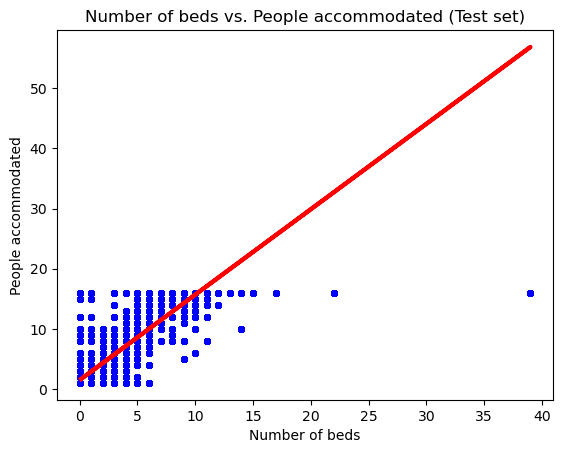

In [49]:
#And now we make the plot!
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of beds vs. People accommodated (Test set)')
plot_test.xlabel('Number of beds')
plot_test.ylabel('People accommodated')
plot_test.show()

In [51]:
#Creating objects that contain the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [55]:
#Printing model summary stats
print('Slope:' ,bed_regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.42122969]]
Mean squared error:  3.426306913824716
R2 score:  0.7284985298673485


In [57]:
#Now we create a dataframe with the predicted and actual values for y to see how close we were...
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        2   2.885632
1        4   4.306862
2        8   8.570551
3        8   5.728092
4        7   7.149321
5        2   2.885632
6       13   8.570551
7        4   4.306862
8        2   2.885632
9       16  12.834240
10      16   8.570551
11       8   7.149321
12       8   7.149321
13       6   7.149321
14       5   4.306862
15       4   2.885632
16      10   7.149321
17       4   4.306862
18       2   2.885632
19       6   4.306862
20       8   5.728092
21       4   2.885632
22       3   2.885632
23       8   7.149321
24       4   2.885632
25       2   2.885632
26       2   2.885632
27       4   5.728092
28       3   4.306862
29       1   2.885632

**#04 Thoughts**

My regression model turned out better than the example one in the exercise--although to be fair, I did choose a slightly more obvious correlation. It still wasn't a perfect model, at an R2 score of ~0.73. But at least by the plot, it does look like the correlation is pretty strong. As the number of beds increases, so does the number of people a listing will accommodate.

I'm not too concerned about data bias with this dataset. The thing that might confound the algorithm is that some beds accommodate two people, and I think some Airbnbs will have "bunks" that aren't categorized as "beds" but the listing will still accommodate more people.